# Metoda najmniejszych kwadratów

W tym notatniku poruszymy kwastie związane z dopasowaniem modelu do danych pomiarowych (aproksymacja) z wykorzystaniem metody najmniejszych kwadratów.
Notatnik powstał z pomocą Macieja Stanucha za co mu w tym miejscu serdecznie dziękuje.



In [24]:
import matplotlib.pyplot as plt
import numpy as np

Na początek przygotujmy funkcje do genracji wykresów

In [25]:
def wygenerujWykres(wektor_czasu, dane, dane_po_fitowaniu = None):
    plt.scatter(wektor_czasu, dane)
    if (np.shape(dane_po_fitowaniu) != ()):
        plt.plot(wektor_czasu, np.squeeze(dane_po_fitowaniu), 'r')
    plt.title("Dane pomiarowe")
    plt.xlabel("Czas pomiaru")
    plt.ylabel("Wartości pomiaru")
    plt.grid()
    plt.show()

oraz funkcje, które wykorzystamy do aproksymacji czyli fuknja liniowa, kwadratowa, wykładnicza

In [26]:
def funkcjaLiniowa(x, a, b):
    return a * x + b

def funkcjaKwadratowa(x, a, b, c):
    return a * x**2 + b * x + c

def wielomianTrzeciegoStopnia(x, a, b, c, d):
    return a * x**3 + b*x**2 + c * x + d

def funkcjaWykladnicza(x, a):
    return 1 - np.exp(a * x)

Zdefiniujmy rowniez funkcje pomocnicze. Między innymi funkcję do wyznaczania równania LSQ oraz macierze do odpowiednich funkcji aproksymujących

In [27]:
def rownanieMacierzoweLSQ(X, Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

def wyliczWspolczynnikiMetodaMacierzowa(x, y):
    X = np.matrix([np.ones(np.shape(x)[0]), x]).T
    Y = np.matrix(y).T
    return rownanieMacierzoweLSQ(X, Y)

def wyliczWspolczynnikiMetodaMacierzowaDlaFKwadrat(x, y):
    X = np.matrix([np.ones(np.shape(x)[0]), x, x**2]).T
    Y = np.matrix(y).T
    return rownanieMacierzoweLSQ(X, Y)

def wyliczWspolczynnikiMetodaMacierzowaDlaWielomianu(x, y):
    X = np.matrix([np.ones(np.shape(x)[0]), x, x**2, x**3]).T
    Y = np.matrix(y).T
    return rownanieMacierzoweLSQ(X, Y)

def wyznaczFitowanaProsta(x, wspolczynniki):
    return np.array(wspolczynniki[0] + wspolczynniki[1] * x)

def wyznaczFitowanaFKwadrat(x, wspolczynniki):
    return np.array(wspolczynniki[0] + wspolczynniki[1] * x + wspolczynniki[2] * x ** 2)

def wyznaczFitowanaWielomianu(x, wspolczynniki):
    return np.array(wspolczynniki[0] + wspolczynniki[1] * x + wspolczynniki[2] * x ** 2 + wspolczynniki[3] * x ** 3)

## Generujemy dane pomiarowe

Na początek wektor czasu

In [28]:
liczba_pkt_pomiarowych = 100
czas_pomiaru = 100 # wiekszy od 1
wzmocnienie_szumu = 1 # dla 0 brak szumu
wektor_czasu = np.linspace(1,czas_pomiaru, liczba_pkt_pomiarowych)


oraz wektor warości dla określonych paramtrów a i b

In [29]:
a = 0.1
b = 10
linia_prosta = funkcjaLiniowa(wektor_czasu, a, b)
wspolczynniki = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, linia_prosta)
linia_prosta_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki)

oraz dane zakłócone, żeby zmienić rozkład zakłóceń z równomiernego na rozkład normalny należy zamienić np.random.rand na np.random.randn. Zmianę parametrów statystycznych uzyskujemy doodając i mnożąc wartości, tak jak zostało to pokazane na lab 1.

In [30]:
linia_prosta_szum = linia_prosta + wzmocnienie_szumu*np.random.rand(liczba_pkt_pomiarowych)
wspolczynniki_szum = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, linia_prosta_szum)
display(wspolczynniki_szum)
linia_prosta_szum_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki_szum)

matrix([[10.54619105],
        [ 0.09826441]])

Porównajcie otrzymane wartosci parametrów z zadanymi

W ramach treningu proponuję zmienić funkcję wygenerujWykres, tak aby można było definiować podpisy osi jako parametr. Taka funkcja przyda się Wam wielokrotnie. Rysujemy

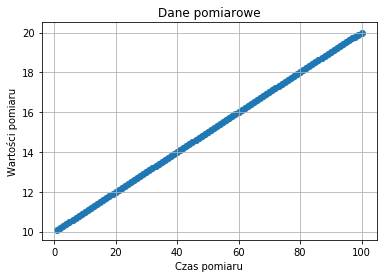

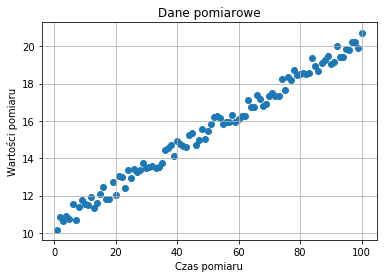

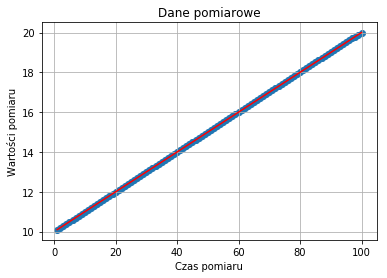

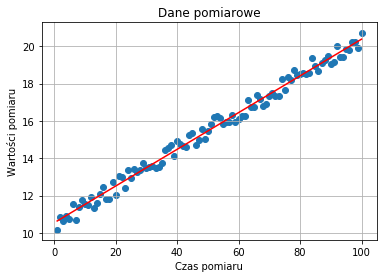

In [33]:
wygenerujWykres(wektor_czasu, linia_prosta)
wygenerujWykres(wektor_czasu, linia_prosta_szum)
wygenerujWykres(wektor_czasu, linia_prosta, linia_prosta_fit)
wygenerujWykres(wektor_czasu, linia_prosta_szum, linia_prosta_szum_fit)

Analogicznie postąpimy w przypadku funkcji kwadratowej

In [35]:
a = 0.2
b = -8
c = 4
wzmocnienie_szumu = 40
funkcja_kwadratowa = funkcjaKwadratowa(wektor_czasu, a, b, c)
wspolczynniki = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, funkcja_kwadratowa)
display(wspolczynniki)
funkcja_kwadratowa_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki)
wspolczynniki_kwadrat = wyliczWspolczynnikiMetodaMacierzowaDlaFKwadrat(wektor_czasu, funkcja_kwadratowa)
display(wspolczynniki_kwadrat)
funkcja_kwadratowa_fit2 = wyznaczFitowanaFKwadrat(wektor_czasu, wspolczynniki_kwadrat)
funkcja_kwadratowa_szum = funkcja_kwadratowa + wzmocnienie_szumu*np.random.rand(liczba_pkt_pomiarowych)
wspolczynniki_szum = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, funkcja_kwadratowa_szum)
display(wspolczynniki_szum)
funkcja_kwadratowa_szum_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki_szum)

matrix([[-339.4],
        [  12.2]])

matrix([[ 4. ],
        [-8. ],
        [ 0.2]])

matrix([[-321.38688354],
        [  12.24604781]])

Zauważcie, że w tym przypadku model liniowy jest nieadekwatny.

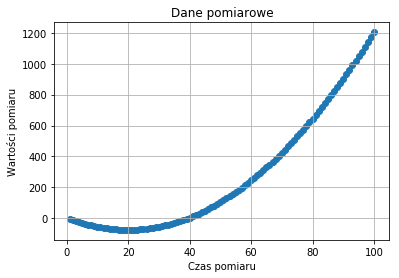

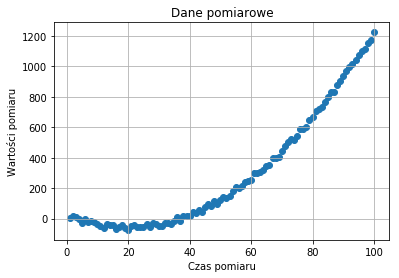

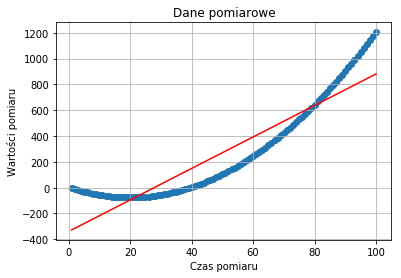

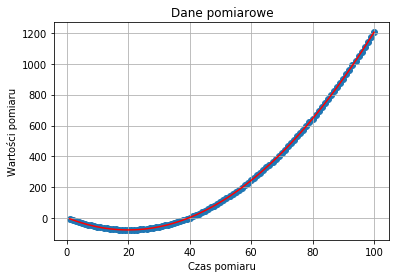

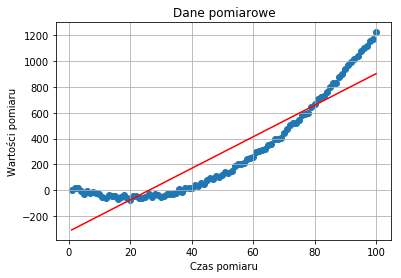

In [36]:
wygenerujWykres(wektor_czasu, funkcja_kwadratowa)
wygenerujWykres(wektor_czasu, funkcja_kwadratowa_szum)
wygenerujWykres(wektor_czasu, funkcja_kwadratowa, funkcja_kwadratowa_fit)
wygenerujWykres(wektor_czasu, funkcja_kwadratowa, funkcja_kwadratowa_fit2)
wygenerujWykres(wektor_czasu, funkcja_kwadratowa_szum, funkcja_kwadratowa_szum_fit)

I wielomian wyższego rzędu

In [39]:
a = 0.01
b = -1
c = 4
d = -30
wzmocnienie_szumu = 100
wielomian = wielomianTrzeciegoStopnia(wektor_czasu, a, b, c, d)
wspolczynniki = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, wielomian)
display(wspolczynniki)
wielomian_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki)
wspolczynniki_wielomian = wyliczWspolczynnikiMetodaMacierzowaDlaWielomianu(wektor_czasu, wielomian)
wielomian_fit_dobry = wyznaczFitowanaWielomianu(wektor_czasu, wspolczynniki_wielomian)
display(wspolczynniki_wielomian)
wielomian_szum = wielomian + wzmocnienie_szumu*np.random.rand(liczba_pkt_pomiarowych)
wspolczynniki_szum = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, wielomian_szum)
display(wspolczynniki_szum)
wielomian_szum_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki_szum)

matrix([[-383.702],
        [  -5.496]])

matrix([[-3.e+01],
        [ 4.e+00],
        [-1.e+00],
        [ 1.e-02]])

matrix([[-325.12438068],
        [  -5.61185045]])

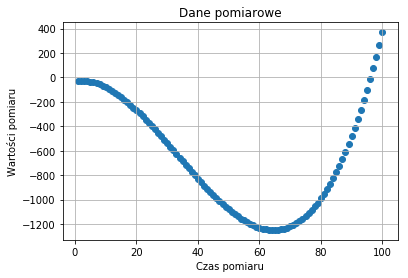

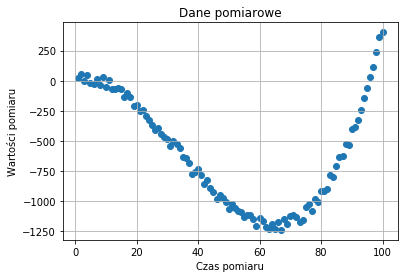

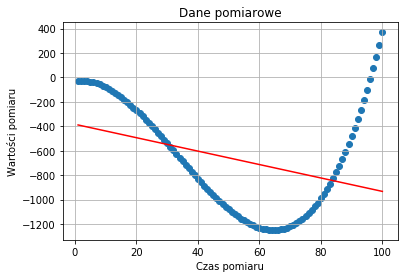

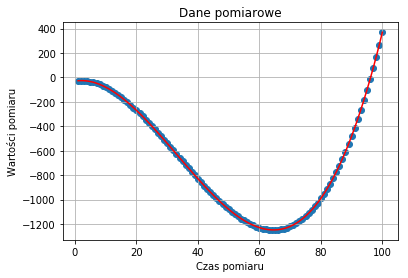

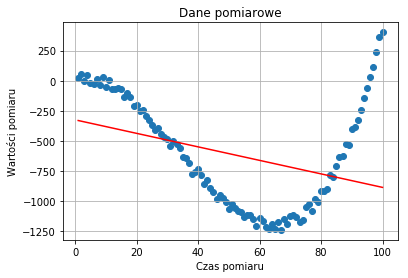

In [40]:
wygenerujWykres(wektor_czasu, wielomian)
wygenerujWykres(wektor_czasu, wielomian_szum)
wygenerujWykres(wektor_czasu, wielomian, wielomian_fit)
wygenerujWykres(wektor_czasu, wielomian, wielomian_fit_dobry)
wygenerujWykres(wektor_czasu, wielomian_szum, wielomian_szum_fit)

In [41]:
a = -0.03
wzmocnienie_szumu = 1
funkcja_wykladnicza = funkcjaWykladnicza(wektor_czasu, a)
wspolczynniki = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, funkcja_wykladnicza)
funkcja_wykladnicza_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki)

funkcja_wykladnicza_szum = funkcja_wykladnicza + wzmocnienie_szumu*np.random.rand(liczba_pkt_pomiarowych)
wspolczynniki_szum = wyliczWspolczynnikiMetodaMacierzowa(wektor_czasu, funkcja_wykladnicza_szum)
funkcja_wykladnicza_szum_fit = wyznaczFitowanaProsta(wektor_czasu, wspolczynniki_szum)

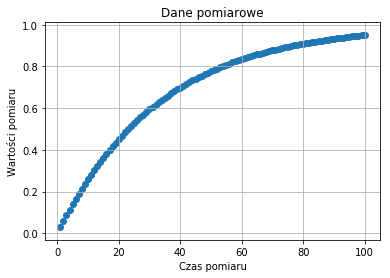

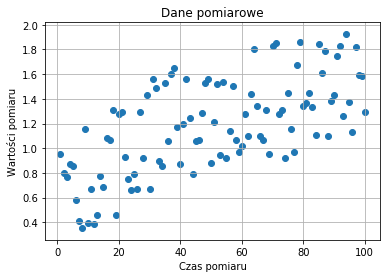

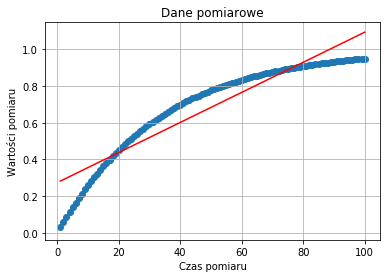

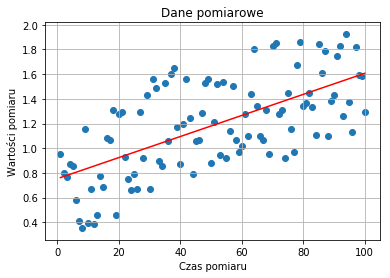

In [42]:
wygenerujWykres(wektor_czasu, funkcja_wykladnicza)
wygenerujWykres(wektor_czasu, funkcja_wykladnicza_szum)

wygenerujWykres(wektor_czasu, funkcja_wykladnicza, funkcja_wykladnicza_fit)
wygenerujWykres(wektor_czasu, funkcja_wykladnicza_szum, funkcja_wykladnicza_szum_fit)

Proszę spróbować wygenerować inny rozkład zakłóceń, z wartoscią oczekiwaną różną od zera. Czy wpłynie to na "jakość" dopasowania?